# AMLD2018 Session 2: Visualization with Python

Aleksandra Sokolowska

-------------------------------

# Word Cloud

We'll explore first a smaller version of the dataset written in a json format. We'll edit the data, combine the bodies of the emails into one full text and visualize the most frequent keywords as a "word cloud".

In [2]:
import json

In [3]:
#load the data
with open('../datajson_sample.json') as json_data:
    d = json.load(json_data)
    
#alternatively if you want to repeat it on the full dataset    
#with open('fulldatastuff.json') as json_data:
    #d = json.load(json_data)

In [143]:
#what are the keys in this dictionary
list(d.keys())[:10]

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [144]:
#data structure
d['0']

{'body': 'How many more states can we get to follow Connecticut? \xa0Way to go!',
 'date': '2016-05-17T19:51:22-07:00',
 'from': 'GardeM@dnc.org',
 'from_name': 'Maureen Garde',
 'subject': 'Re: CT To Automatically Register 400,000 Voters',
 'to': [['"Davis, Marilyn"', 'DavisM@dnc.org']]}

In [145]:
d['1']

{'body': '\nShe maxed out to us earlier this year total unprompted and came in for a check drop with DWS. I know it gets close to the Vernon Jordan/VJ world so wanted to run it past you before I reached\r\n out. \n\xa0\nLet me know what you think. Thanks!\n\xa0\nAlex Shapiro\nMid Atlantic & PAC Finance Director\nDemocratic National Committee\n(202) 479-5187 (o) | (858) 361-2468 (c)\nshapiroa@dnc.org\nClick here to donate!\n\xa0\n',
 'date': '2016-05-04T06:58:23-07:00',
 'from': 'ShapiroA@dnc.org',
 'from_name': '"Shapiro, Alexandra"',
 'subject': 'What about asking Toni Bush to host?',
 'to': [['"Kaplan, Jordan"', 'KaplanJ@dnc.org']]}

In [146]:
#example on one email:
#data cleaning: manually remove newlines, etc. we observed
msg = d['1090']['body'].replace('\n', ' ').replace('\r', '').replace('\xa0','')
#print(msg)

In [147]:
#example on one email:
#data contains the whole chain of emails; trash them on one example
indx = msg.find("From:")
msg[:indx]


' Oh calm dowwwnnnnn. I just sent something!    '

In [148]:
#applied to all
data = ''
for n in d.keys():
    try:
        msg = d[n]['body'].replace('\n', ' ').replace('\r', '').replace('\xa0','').replace('\t', ' ')
        indx = msg.find("From:")
        data = data + msg[:indx]
    except KeyError:
        continue
    

In [149]:
data[:1000] #still full of trash like phone numbers but we won't bother..

'How many more states can we get to follow Connecticut? Way to go She maxed out to us earlier this year total unprompted and came in for a check drop with DWS. I know it gets close to the Vernon Jordan/VJ world so wanted to run it past you before I reached  out.   Let me know what you think. Thanks!  Alex Shapiro Mid Atlantic & PAC Finance Director Democratic National Committee (202) 479-5187 (o) | (858) 361-2468 (c) shapiroa@dnc.org Click here to donate!  Do we have the rights to the music in the video re: how the GOP created trump?   Jacquelyn Lopez | Perkins Coie LLP ASSOCIATE* 700 Thirteenth Street, N.W. Suite 600 Washington, DC 20005-3960 D. +1.202.654.6371 F. +1.202.654.9949 E. JacquelynLopez@perkinscoie.com *Admitted in State of Florida; Admission to DC Bar pending.       uusefy@vnnic.net.vn Sean T. can stun Kaplanj with her SEXY FIT             8:49p from Viet Nam (2.47 KB)            The congressional baseball game is on the 23rd, so I’d go for the 21st instead. They’re checki

(-0.5, 399.5, 199.5, -0.5)

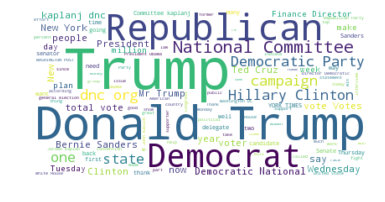

In [150]:
#make the plot
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Read the whole text.
text = data
#data.replace("font size", "").replace("font family", "").replace("background color", "").replace("font weight", "").replace("1px solid", "")

# Generate a word cloud image
stopwords = set(STOPWORDS)
other_trash = ["even","font size", "font family", "background color", "font weight", 
               "1px solid", "said", "will", "also", "still"]

for word in other_trash:
    stopwords.add(word)

wc = WordCloud(background_color="white", max_words=500,
               stopwords=stopwords)
wc.generate(text)

# Display the generated image:
# the matplotlib way:

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")


# Simple social network analysis

First, we'll get a feeling for the Graph class.

In [151]:
import networkx as nx
G = nx.Graph() #This class implements an undirected graph. 
#It ignores multiple edges between two nodes. It does allow self-loop edges between a node and itself


In [152]:
G

In [153]:
G.add_node(1) #add one node

In [154]:
G.add_nodes_from([2, 3]) #add a list of nodes


In [155]:
G.node

{1: {}, 2: {}, 3: {}}

In [156]:
G.add_edge(1, 2)

In [157]:
G.edge

{1: {2: {}}, 2: {1: {}}, 3: {}}

In [158]:
G.add_edges_from([(1, 2), (1, 3)])

In [159]:
G.edge

{1: {2: {}, 3: {}}, 2: {1: {}}, 3: {1: {}}}

In [160]:
list(G.node)

[1, 2, 3]

In [161]:
#adding attributes
G[1][3]['color'] = "blue"
G.adj.items()

dict_items([(1, {2: {}, 3: {'color': 'blue'}}), (2, {1: {}}), (3, {1: {'color': 'blue'}})])

Now, we'll load the dataset and populate nodes and edges of the future graph.

In [162]:
import json
#load the data
with open('../datajson_sample.json') as json_data:
    d = json.load(json_data)
#with open('fulldatastuff.json') as json_data:
    #d = json.load(json_data)

In [163]:
#look at the data structure and see where to massage the data
d['0']

{'body': 'How many more states can we get to follow Connecticut? \xa0Way to go!',
 'date': '2016-05-17T19:51:22-07:00',
 'from': 'GardeM@dnc.org',
 'from_name': 'Maureen Garde',
 'subject': 'Re: CT To Automatically Register 400,000 Voters',
 'to': [['"Davis, Marilyn"', 'DavisM@dnc.org']]}

In [164]:
#get rid of the email address & the quotation marks in senders and receivers
d['1']['to'][0][0].replace('"', '')

'Kaplan, Jordan'

In [165]:
#similar on from
d['1']['from_name'].replace('"', '')

'Shapiro, Alexandra'

In [166]:
#extract nodes and edges
#1. unique names as nodes
#2. all relationships as edges as [G.add_edges_from([(from, to), (from, to)])]
nodes = []
edges = []
for n in d.keys():
    try:
        to = d[n]['to'][0][0].replace('"', '')
        frm = d[n]['from_name'].replace('"', '')
        if to==',' or frm==',': #lose some data, could be extracted from the email address
            continue
        nodes.append(to)
        nodes.append(frm)
        edges.append([to, frm])
    except IndexError: #no "to" field
        continue

In [167]:
edges[:5]

[['Davis, Marilyn', 'Maureen Garde'],
 ['Kaplan, Jordan', 'Shapiro, Alexandra'],
 ['Freundlich, Christina', ''],
 ['Kaplan, Jordan', 'Comer, Scott'],
 ['Kaplan, Jordan', 'Michael Schrum']]

In [168]:
nodes[:5]

['Davis, Marilyn',
 'Maureen Garde',
 'Kaplan, Jordan',
 'Shapiro, Alexandra',
 'Freundlich, Christina']

## Designing the graph

In [169]:
import networkx as nx
G = nx.DiGraph() # a directed graph since relationships are not necessarily reciprocal

In [170]:
G.add_nodes_from(nodes)

In [171]:
{k: G.node[k] for k in list(G.node)[:5]}

{'Davis, Marilyn': {},
 'Freundlich, Christina': {},
 'Kaplan, Jordan': {},
 'Maureen Garde': {},
 'Shapiro, Alexandra': {}}

In [172]:
G.add_edges_from(edges)

In [173]:
{k: G.edge[k] for k in list(G.edge)[:2]}

{'Davis, Marilyn': {'Maureen Garde': {}}, 'Maureen Garde': {}}

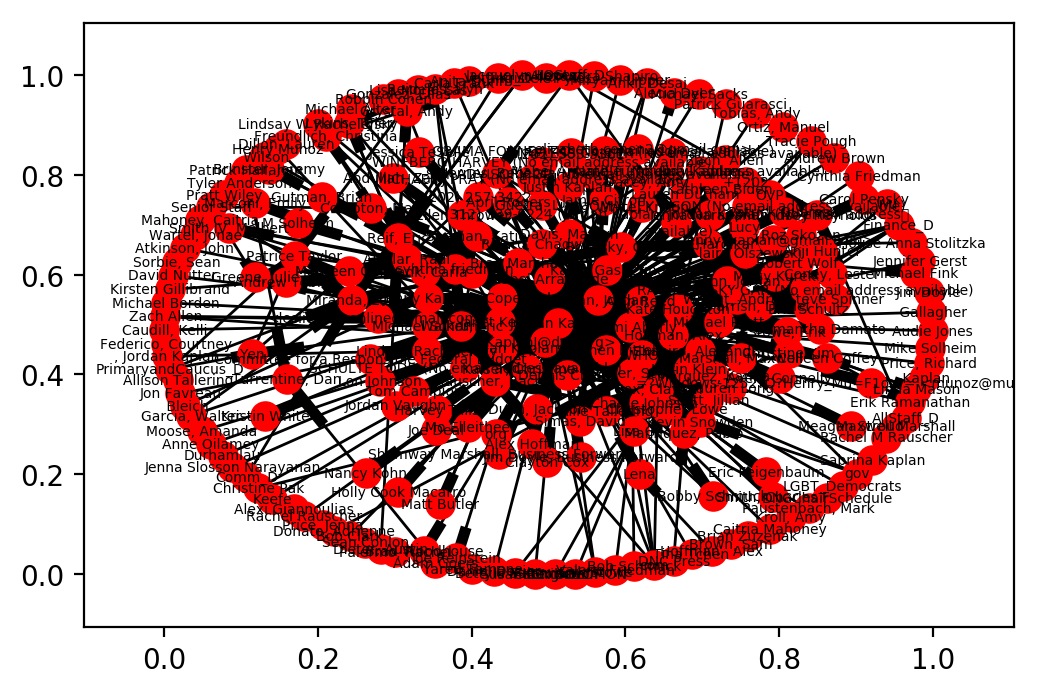

In [174]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = mpl.rcParamsDefault['figure.dpi']*2
pos = nx.shell_layout(G)
nx.draw_networkx(G, font_size='5',node_size=100)
# show graph


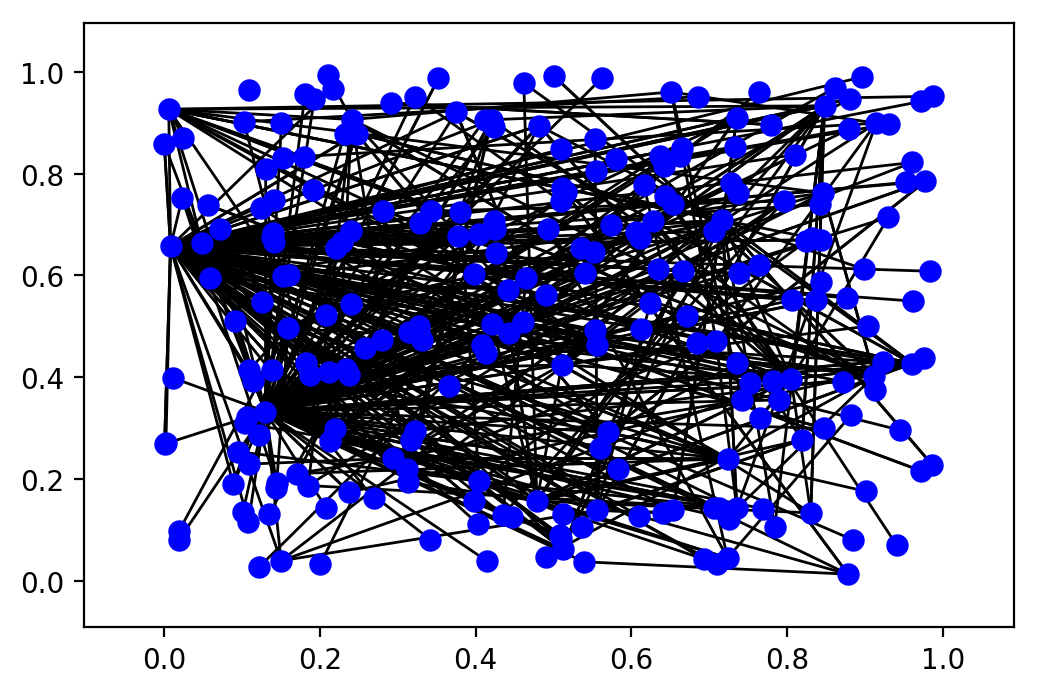

In [175]:
#more options, including pre-defining the layout of the graph (more below)
nx.draw_networkx(G, pos=nx.random_layout(G),with_labels=False, node_color="blue", node_size=50, colormap="Earth", arrows=False)

## Prettier & more functional graph with plotly

We define the coordinates of the scattered points and the attributes of the nodes. Pick a graph layout.

In [176]:
pos=nx.spring_layout(G,k=.12) #Position nodes using Fruchterman-Reingold force-directed algorithm.

#pos=nx.shell_layout(G) #Position nodes in concentric circles.

#pos=nx.random_layout(G) # Position nodes uniformly at random in the unit square.

In [177]:
nx.spring_layout?

Choose some characteristic that can be displayed on the interactive network graph.

In [178]:
#centralScore = nx.betweenness_centrality(G) #measure of how influential a node is in a network; role as a connector
inScore = G.in_degree() #number of "in" links of the nodes
outScore = G.out_degree()

In [179]:
centralScore = nx.average_neighbor_degree(G)
#The degree of connectivity to a node in a network is a measure of the number of in and out links the node has to other nodes. 

__Define scatter_nodes() and scatter_edges()__ which place nodes and edges according to "pos". We color-code the nodes by a centralScore quantity.

In [180]:
# Get a list of all people in nodes as keys 
nodeID = G.node.keys()

In [181]:

from plotly.graph_objs import *

def scatter_nodes(pos, labels=None, color='rgb(152, 0, 0)', size=8, opacity=1):
    # pos is the dict of node positions
    # labels is a list  of labels of len(pos), to be displayed when hovering the mouse over the nodes
    # color is the color for nodes. When it is set as None the Plotly default color is used
    # size is the size of the dots representing the nodes
    # opacity is a value between [0,1] defining the node color opacity

    trace = Scatter(x=[], #graph object of plotly
                    y=[],  
                    mode='markers', 
                    marker=Marker(
        showscale=True,
        # colorscale options
        # 'Greys' | 'Greens' | 'Bluered' | 'Hot' | 'Picnic' | 'Portland' |
        # Jet' | 'RdBu' | 'Blackbody' | 'Earth' | 'Electric' | 'YIOrRd' | 'YIGnBu'
        colorscale='Earth',
        reversescale=True,
        color=[], 
        size=10,         
        colorbar=dict(
            thickness=15,
            title='Average degree of the neighborhood of each node', #our centralScore
            xanchor='left',
            titleside='right'
        ),
    line=dict(width=2)))
    for nd in nodeID:
        trace['x'].append(pos[nd][0])
        trace['y'].append(pos[nd][1])
        trace['marker']['color'].append(centralScore[nd]) #color-coding by the value of this variable
    attrib=dict(name='', text=labels , hoverinfo='text', opacity=opacity) # a dict of Plotly node attributes
    trace=dict(trace, **attrib)# concatenate the dict trace and attrib
    trace['marker']['size']=size
    return trace

In [182]:
def scatter_edges(G, pos, line_color='#a3a3c2', line_width=1, opacity=.2):
    trace = Scatter(x=[], 
                    y=[], 
                    mode='lines',
                   )
    for edge in G.edges():
        trace['x'] += [pos[edge[0]][0],pos[edge[1]][0], None]
        trace['y'] += [pos[edge[0]][1],pos[edge[1]][1], None]  
        trace['hoverinfo']='none'
        trace['line']['width']=line_width
        if line_color is not None: # when it is None a default Plotly color is used
            trace['line']['color']=line_color
    return trace

In [183]:
# Node label info on hover; use html tags such as line break <br>
labels = []

for nd in nodeID:
    labels.append("Id: " + str(nd) + "<br>" + "Received: " + str(inScore[nd]) + "<br>" + "Sent: " + str(outScore[nd]) + "<br>" + "Centrality: " + str("%0.3f" % centralScore[nd]))

In [184]:
trace1=scatter_edges(G, pos)
trace2=scatter_nodes(pos, labels=labels)


In [185]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot #offline mode of plotly without an account
init_notebook_mode(connected=True) #enabling plotting inside the notebook
import plotly
import plotly.plotly as py
from plotly.graph_objs import *
width=600
height=600
axis=dict(showline=False, # hide axis line, grid, ticklabels and  title
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title='' 
          )
layout=Layout(title= 'DNC Email communication graph',
    font= Font(),
    showlegend=False,
    autosize=False,
    width=width,
    height=height,
    xaxis=dict(
        title='WikiLeaks Data, Applied Machine Learning Days 2018',
        titlefont=dict(
        size=14,
        color='#7f7f7f'),
        showline=False,
        showticklabels=False,
        zeroline=False
    ),
    yaxis=YAxis(axis),
    margin=Margin(
        l=40,
        r=40,
        b=85,
        t=100,
        pad=0,
       
    ),
    hovermode='closest',
    plot_bgcolor='#EFECEA', #set background color            
    )


data=Data([trace1, trace2])

fig = Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

# 2D interactive matrix. Example - most common email exchanges

Now we'll introduce another library for interactive visualizations: bokeh. Our goal is to display a 2D plot of a number count of most common email exchanges. First, we need to clean the data with pandas.

In [186]:
#testing pandas
import pandas as pd
def load_json_data(path_to_file):
    lol = pd.read_json(path_to_file,encoding='ascii')
    data_DF = lol.T
    data_DF['from'] = data_DF['from'].str.lower()
    data_DF['body'] = data_DF['body'].apply(lambda x: " ".join(str(x).split()))
    print(data_DF['body'])
    return data_DF



data = load_json_data("../fulldatastuff.json")



0        How many more states can we get to follow Conn...
1        She maxed out to us earlier this year total un...
10                                                     nan
100      Jordan KaplanNational Finance DirectorDemocrat...
1000                                                   nan
10000    NEGATIVE-REPUBLICANS Donald Trump’s Strange Wo...
10001    Looks good. Please don’t forgot to change the ...
10002    Wow. Could blast this out too. SL: BREAKING: N...
10003    5/18/2016 NATIONAL VIDEO REPORT CBS This Morni...
10004    Certainly we will have to address what’s happe...
10005    DNC Talking Points Cruz Out, Trump is the GOP ...
10006                                                  nan
10007    I’m merging. eVeryone else hold off. Luis Mira...
10008    Yes. We took out the last line about Clinton s...
10009                                                     
1001                                                   nan
10010    Medium Daily DigestRecommended byMedium StaffT.

In [187]:
#drop the columns we will not use
data.drop(['date','from','subject'], axis=1, inplace=True)
#data.drop(['body'], axis=1, inplace=True)
data.head()

,body,from_name,to
0,How many more states can we get to follow Conn...,Maureen Garde,"[[""Davis, Marilyn"", DavisM@dnc.org]]"
1,She maxed out to us earlier this year total un...,"""Shapiro, Alexandra""","[[""Kaplan, Jordan"", KaplanJ@dnc.org]]"
10,nan,Contribution,"[[,, allenz@dnc.org], [,, parrishd@dnc.org], [..."
100,Jordan KaplanNational Finance DirectorDemocrat...,Jordan Kaplan,"[[""Rauscher, Rachel"", RauscherR@dnc.org]]"
1000,nan,Natasha Korecki,[]


In [188]:
#to column has again name & email; we'll drop the email
data['to'][0][0][0]

'"Davis, Marilyn"'

In [189]:
import numpy as np
data['to_name'] = np.nan #create a new column with some value, e.g. nan
for i in range(len(data['to'])):
    try:
        data['to_name'][i] = data['to'][i][0][0]
    except IndexError:
        data['to_name'][i] = ''


//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

//anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [190]:
#now we can remove "to"
data.drop(['to'], axis=1, inplace=True)

In [191]:
data.head()

,body,from_name,to_name
0,How many more states can we get to follow Conn...,Maureen Garde,"""Davis, Marilyn"""
1,She maxed out to us earlier this year total un...,"""Shapiro, Alexandra""","""Kaplan, Jordan"""
10,nan,Contribution,","
100,Jordan KaplanNational Finance DirectorDemocrat...,Jordan Kaplan,"""Rauscher, Rachel"""
1000,nan,Natasha Korecki,


In [192]:
#we can clean the data not to contain comas
data = data[(data.to_name.str.contains(",") == False)]

In [193]:
#or empty spaces, this can be done in the following way
data['to_name'].replace('', np.nan, inplace=True)
data.dropna(subset=['to_name'], inplace=True)

In [194]:
data.head()

,body,from_name,to_name
10004,Certainly we will have to address what’s happe...,"""Banfill, Ryan""",Debbie Wasserman Schultz
10009,,Mark Paustenbach,Luis Miranda
1001,nan,"""Cox, Clayton""","WHO"""
10011,nan,Scott Arceneaux,Tracie Pough
10013,Shot: Chaser: View this post on our Factivists...,DNC Press,DNC Press


In [195]:
#we can inspect the data: how many entries for each person
data['from_name'].value_counts().head()

"Hendricks, Lauren"    1482
DNC Press              1089
"Sarge, Matthew"        983
"Brinster, Jeremy"      851
"Miranda, Luis"         733
Name: from_name, dtype: int64

In [196]:
data['to_name'].value_counts().head()

Comm_D        5339
Research_D    2349
Tony Carrk    1441
DNC Press     1104
RR2            832
Name: to_name, dtype: int64

In [197]:
#group together by from_name, count the number of total entries for each sender
data.groupby('from_name')['to_name'].count().head()

from_name
                  37
 Asencios"         1
 Daughtry"         1
 David Sutphen     3
 EOP"              2
Name: to_name, dtype: int64

In [198]:
#group together from and to, and then count repeated occurrences
dataset = data.groupby(['from_name', 'to_name']).size().reset_index(name='count')
dataset.head()

,from_name,to_name,count
0,,"""",1
1,,Brian Bond DemCon,1
2,,"COM""",1
3,,Claire Olszewski,1
4,,CommsApproval_D,1


In [199]:
#sort them
dataset=dataset.sort_values(by = 'count', ascending = False)

In [200]:
#soured by most interactions
dataset.head()

,from_name,to_name,count
383,"""Hendricks, Lauren""",Tony Carrk,1405
1256,DNC Press,DNC Press,1082
815,"""Sarge, Matthew""",Comm_D,820
1779,"Yen""",Comm_D,469
335,"""Garcia, Walter""",Comm_D,442


In [201]:
#we are interested in the most common communicators
exceptions = list(dataset[:20]['from_name'])+list(dataset[:20]['to_name'])
exceptions = list(set(exceptions))
print(exceptions)

['DNC Press', 'Comm_D', 'Research_D', '"Freundlich, Christina"', '"Garcia, Walter"', '"Sorbie, Sean"', '"Manriquez, Pablo"', '"Roberts, Kelly"', 'Hillary for America Press', '"Hendricks, Lauren"', '"Bennett, Eric"', 'Yen"', '"Haxo, Chris"', 'Tony Carrk', '"Brinster, Jeremy"', '"Sarge, Matthew"', '"Yoxall, Collin"', '"Kasnetz, Joel"', '"Paustenbach, Mark"', '"Walker, Eric"']


In [202]:
# Now, we'll create a matrix of the data
ds = dataset.set_index('from_name')
new = ds.pivot_table(values='count', index=ds.index, columns='to_name')
new.head()

to_name,"Aikowsky""","Anton""","Bittel""",David Sutphen,"EOP Allen""","Earnest""","Eop""",Executive Assistant,"Gallagher""","Goodman""",...,maura clark,"net""","org""","oz III""",patrick lannon,presstwitter_d,robert stowe,tammy paster,tina exarhos,tkjj6547
from_name,,,,,,,,,,,,,,,,,,,,,
,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
"Asencios""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Daughtry""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
David Sutphen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"EOP""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
#delete rows which are not common communicators
one = new[new.index.isin(exceptions)]

In [204]:
one

to_name,"Aikowsky""","Anton""","Bittel""",David Sutphen,"EOP Allen""","Earnest""","Eop""",Executive Assistant,"Gallagher""","Goodman""",...,maura clark,"net""","org""","oz III""",patrick lannon,presstwitter_d,robert stowe,tammy paster,tina exarhos,tkjj6547
from_name,,,,,,,,,,,,,,,,,,,,,
"""Bennett, Eric""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Brinster, Jeremy""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Freundlich, Christina""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
"""Garcia, Walter""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN
"""Haxo, Chris""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Hendricks, Lauren""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Kasnetz, Joel""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Manriquez, Pablo""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN
"""Paustenbach, Mark""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
cols = [col for col in one.columns if col in exceptions]
df2 = one[cols]
#zeros non nans
df2 = df2.fillna(value=0)
df2

to_name,Comm_D,DNC Press,Hillary for America Press,Research_D,Tony Carrk,"Yen"""
from_name,,,,,,
"""Bennett, Eric""",376.0,0.0,0.0,338.0,0.0,0.0
"""Brinster, Jeremy""",410.0,0.0,0.0,364.0,30.0,12.0
"""Freundlich, Christina""",201.0,0.0,0.0,0.0,0.0,16.0
"""Garcia, Walter""",442.0,0.0,0.0,0.0,0.0,3.0
"""Haxo, Chris""",13.0,0.0,0.0,191.0,0.0,0.0
"""Hendricks, Lauren""",45.0,0.0,0.0,4.0,1405.0,0.0
"""Kasnetz, Joel""",11.0,0.0,0.0,158.0,0.0,0.0
"""Manriquez, Pablo""",265.0,8.0,0.0,0.0,0.0,5.0
"""Paustenbach, Mark""",155.0,2.0,0.0,0.0,0.0,3.0


In [206]:
df2.keys()

Index(['Comm_D', 'DNC Press', 'Hillary for America Press', 'Research_D',
       'Tony Carrk', 'Yen"'],
      dtype='object', name='to_name')

In [207]:
df2.index

Index(['"Bennett, Eric"', '"Brinster, Jeremy"', '"Freundlich, Christina"',
       '"Garcia, Walter"', '"Haxo, Chris"', '"Hendricks, Lauren"',
       '"Kasnetz, Joel"', '"Manriquez, Pablo"', '"Paustenbach, Mark"',
       '"Roberts, Kelly"', '"Sarge, Matthew"', '"Sorbie, Sean"',
       '"Walker, Eric"', '"Yoxall, Collin"', 'DNC Press',
       'Hillary for America Press', 'Yen"'],
      dtype='object', name='from_name')

# Bokeh frequency chart

In [208]:
from math import pi
import pandas as pd

from bokeh.io import show
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LinearColorMapper,
    BasicTicker,
    PrintfTickFormatter,
    ColorBar,
)
from bokeh.plotting import figure, output_notebook

frm = list(df2.index) #names of senders
to = list(df2.columns) #names of recipients


# reshape to 1D array or rates with a month and year for each row.
dff = pd.DataFrame(df2.stack(), columns=['count']).reset_index()

# this is the colormap from the original NYTimes plot
colors = ["#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce", "#ddb7b1", "#cc7878", "#933b41", "#550b1d"]
mapper = LinearColorMapper(palette=colors, low=dff['count'].min(), high=dff['count'].max())

In [209]:
dff.head()

,from_name,to_name,count
0,"""Bennett, Eric""",Comm_D,376.0
1,"""Bennett, Eric""",DNC Press,0.0
2,"""Bennett, Eric""",Hillary for America Press,0.0
3,"""Bennett, Eric""",Research_D,338.0
4,"""Bennett, Eric""",Tony Carrk,0.0


In [210]:
#tell bokeh which data frame is the source of data
source = ColumnDataSource(dff)

TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom" #extra interactive functionalities for the toolbox

p = figure(title="Most common e-mail exchanges".format(frm[0], frm[-1]),
           x_range=frm, y_range=to,
           x_axis_location="above", plot_width=900, plot_height=400,
           tools=TOOLS, toolbar_location='below')

#comment and uncomment to see the effect
p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "9pt"
#p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = pi / 3

p.rect(x="from_name", y="to_name", width=1, height=1, #keywords of the source
       source=source,
       fill_color={'field': 'count', 'transform': mapper}, #specify the characteristic value & the mapper value-->color
       line_color=None)

color_bar = ColorBar(color_mapper=mapper, major_label_text_font_size="5pt",
                     ticker=BasicTicker(desired_num_ticks=len(colors)),
                     formatter=PrintfTickFormatter(format="%d"),
                     label_standoff=6, border_line_color=None, location=(0, 0))
p.add_layout(color_bar, 'right')

#choose info to show on hover
p.select_one(HoverTool).tooltips = [('from', '@from_name'),('to', '@to_name'),('#emails', '@count'),]
output_notebook()
show(p)      # show the plot

Loading BokehJS ...

EXTRA: Another way of finding most common communicators.

In [211]:
import numpy as np
import json

with open('../datajson_sample.json') as json_data:
    d = json.load(json_data)
nodes = []
edges = []
save_frm = []
save_to = []
for n in d.keys():
    try:
        to = d[n]['to'][0][0].replace('"', '')
        frm = d[n]['from_name'].replace('"', '')
        if to==',' or frm==',': #lose some data, could be extracted from the email address
            continue
        nodes.append(to)
        nodes.append(frm)
        save_frm.append(frm)
        save_to.append(to)
        edges.append([to, frm])
    except IndexError: #no "to" field
        continue
       

In [212]:
#find most common pairs of people who emailed each other
import collections
import itertools

counts = collections.defaultdict(int)
for collab in edges:
    collab.sort()

    for pair in itertools.combinations(collab, 2):
        counts[pair] += 1

a = {k:v for k, v in counts.items() if v > 10} #subset of most common email exchanges

#for pair, freq in counts.items():
#    print(pair, freq)



In [213]:
{k:v for k, v in counts.items() if v > 20}

{('Bobby Schmuck', 'Jordan Kaplan'): 21,
 ('Claire Olszewski', 'Kaplan, Jordan'): 23,
 ('Comer, Scott', 'Kaplan, Jordan'): 46,
 ('Cox, Clayton', 'Kaplan, Jordan'): 42,
 ('DNC Press', 'DNC Press'): 91,
 ('Kaplan, Jordan', 'Parrish, Daniel'): 36,
 ('Kaplan, Jordan', 'Rauscher, Rachel'): 33,
 ('Kaplan, Jordan', 'Shapiro, Alexandra'): 62,
 ('Kaplan, Jordan', 'Vaughn, Jordan'): 25,
 ('Kaplan, Jordan', 'WHO'): 44,
 ('Kaplan, Jordan', 'Zach  Allen'): 27,
 ('Reif, Eric', 'Vetting_D'): 21}

In [214]:
counter = list(a.values())

In [215]:
names = list(a.keys())
list_names = [i for sub in names for i in sub]
print(list_names)

['Kaplan, Jordan', 'Shapiro, Alexandra', 'Comer, Scott', 'Kaplan, Jordan', 'Kaplan, Jordan', 'WHO', 'Kaplan, Jordan', 'Samantha Damato', 'Kaplan, Jordan', 'Rauscher, Rachel', 'DNC Press', 'DNC Press', 'Kaplan, Jordan', 'Zach  Allen', 'Claire Olszewski', 'Kaplan, Jordan', 'Kaplan, Jordan', 'Vaughn, Jordan', 'Reif, Eric', 'Vetting_D', 'Jordan Kaplan', 'Shapiro, Alexandra', 'Cox, Clayton', 'Kaplan, Jordan', 'Kaplan, Jordan', 'Parrish, Daniel', 'Bobby Schmuck', 'Jordan Kaplan', 'Hoffman, Alex', 'Kaplan, Jordan', 'Comer, Scott', 'Jordan Kaplan', 'Kaplan, Jordan', 'Lindsay Rachelefsky', 'Cox, Clayton', 'Jordan Kaplan', 'Lykins, Tyler', 'Reif, Eric', 'Vaughn, Jordan', 'WHO', 'Kaplan, Jordan', 'Marshall, Maxwell', 'Comer, Scott', 'Finance_D', 'Dennis Cheng', 'Kaplan, Jordan', 'Brad Marshall', 'Kaplan, Jordan', 'Sorbie, Sean', 'Sorbie, Sean', 'Bonosky, Garret', 'Herries, Rebecca']


In [216]:
#concatenate a list to get interesting most frequent names
myset = set(list_names)
print(myset)
list_names = list(myset)

{'Vetting_D', 'Bonosky, Garret', 'Shapiro, Alexandra', 'Brad Marshall', 'Sorbie, Sean', 'DNC Press', 'WHO', 'Zach  Allen', 'Hoffman, Alex', 'Cox, Clayton', 'Marshall, Maxwell', 'Herries, Rebecca', 'Finance_D', 'Dennis Cheng', 'Jordan Kaplan', 'Lykins, Tyler', 'Vaughn, Jordan', 'Lindsay Rachelefsky', 'Samantha Damato', 'Claire Olszewski', 'Comer, Scott', 'Reif, Eric', 'Parrish, Daniel', 'Kaplan, Jordan', 'Bobby Schmuck', 'Rauscher, Rachel'}
